In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ppca import PPCA
sns.set()

In [2]:
import numpy as np
from scipy import linalg

n_samples, n_features, rank = 500, 3, 2
sigma = 1.0
rng = np.random.RandomState(42)
U, _, _ = linalg.svd(rng.randn(n_features, n_features))
X = np.dot(rng.randn(n_samples, rank), U[:, :rank].T)

# Adding homoscedastic noise
X_homo = X + sigma * rng.randn(n_samples, n_features)

X_homo[:5, :] += np.random.normal(0, scale=10, size=X_homo[:5, :].shape)

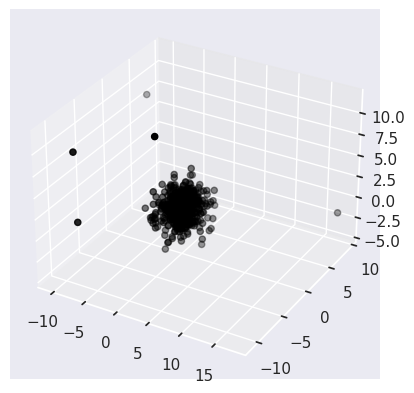

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X_homo[:,0], X_homo[:,1], X_homo[:, 2], color='black')
plt.show()

In [4]:
n_components = 2
ppca_model = PPCA(n_components=n_components)
ppca_model.fit(X_homo)

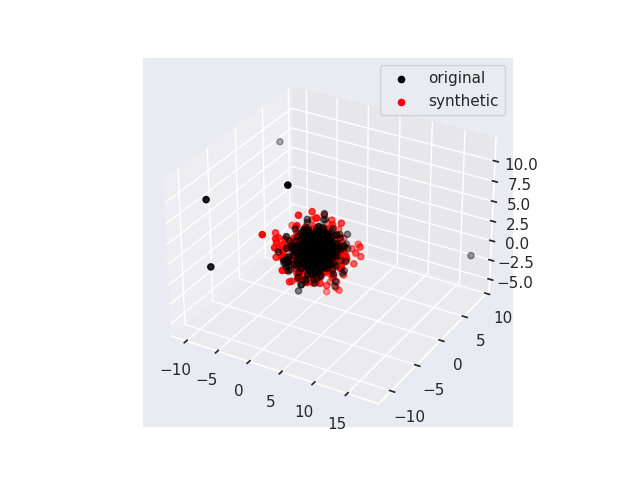

In [5]:
%matplotlib widget
X_gen = ppca_model.gen_data(500)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X_homo[:,0], X_homo[:,1], X_homo[:, 2], color='black', label='original')
ax.scatter(X_gen[:,0], X_gen[:,1], X_gen[:, 2], color='red', label='synthetic')
plt.legend()
plt.show()